In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction,linear_model,model_selection,preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


## DATA==  https://drive.google.com/drive/folders/1ByadNwMrPyds53cA6SDCHLelTAvIdoF_?usp=share_link

## READ DATASETS

In [64]:
fake=pd.read_csv("Fake.csv")
true=pd.read_csv("True.csv")

## DATA CLEANING AND PREPARATION

In [65]:
fake['target']='fake'
true['target']='true'

In [66]:
fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [67]:
true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


In [68]:
data=pd.concat([fake,true]).reset_index(drop=True)

In [69]:
data.tail()

,title,text,subject,date,target
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",true


In [70]:
data.shape

(44898, 5)

In [71]:
from sklearn.utils import shuffle
data=shuffle(data)
data=data.reset_index(drop=True)

In [72]:
data.head()

,title,text,subject,date,target
0,"Trump's travel bans spook some students, fan f...",SAN FRANCISCO (Reuters) - Ramin Forouzandeh ha...,politicsNews,"May 16, 2017",true
1,"Hoyer, asked on German finmin post, says 'extr...",ATHENS (Reuters) - European Investment Bank (E...,worldnews,"September 29, 2017",true
2,WHOA! ANDERSON COOPER GOT MORE Than He Bargain...,Melania Trump is pure class. She refuses to al...,politics,"Oct 20, 2016",fake
3,MASS INTEGRATION: The Race to Capitalize on a...,Randy Johnson 21st Century WireDigital technol...,US_News,"April 18, 2017",fake
4,Slain Officer Had Just Written These Emotiona...,Horror struck once again on Sunday as police o...,News,"July 17, 2016",fake


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [74]:
data.drop(['date'],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,"Trump's travel bans spook some students, fan f...",SAN FRANCISCO (Reuters) - Ramin Forouzandeh ha...,politicsNews,true
1,"Hoyer, asked on German finmin post, says 'extr...",ATHENS (Reuters) - European Investment Bank (E...,worldnews,true
2,WHOA! ANDERSON COOPER GOT MORE Than He Bargain...,Melania Trump is pure class. She refuses to al...,politics,fake
3,MASS INTEGRATION: The Race to Capitalize on a...,Randy Johnson 21st Century WireDigital technol...,US_News,fake
4,Slain Officer Had Just Written These Emotiona...,Horror struck once again on Sunday as police o...,News,fake


In [75]:
data.drop(['title'],axis=1,inplace=True)
data.head()

,text,subject,target
0,SAN FRANCISCO (Reuters) - Ramin Forouzandeh ha...,politicsNews,true
1,ATHENS (Reuters) - European Investment Bank (E...,worldnews,true
2,Melania Trump is pure class. She refuses to al...,politics,fake
3,Randy Johnson 21st Century WireDigital technol...,US_News,fake
4,Horror struck once again on Sunday as police o...,News,fake


In [76]:
data['text']=data['text'].apply(lambda x:x.lower())
data.head()

,text,subject,target
0,san francisco (reuters) - ramin forouzandeh ha...,politicsNews,true
1,athens (reuters) - european investment bank (e...,worldnews,true
2,melania trump is pure class. she refuses to al...,politics,fake
3,randy johnson 21st century wiredigital technol...,US_News,fake
4,horror struck once again on sunday as police o...,News,fake


In [77]:
#REMOVE PUNCTUATIONS

import string

def punctuation_removal(text):
    all_list=[char for char in text if char not in string.punctuation]
    clean_str=''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)
    

In [78]:
data.head()

,text,subject,target
0,san francisco reuters ramin forouzandeh had a...,politicsNews,true
1,athens reuters european investment bank eib p...,worldnews,true
2,melania trump is pure class she refuses to all...,politics,fake
3,randy johnson 21st century wiredigital technol...,US_News,fake
4,horror struck once again on sunday as police o...,News,fake


In [84]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


[nltk_data] Downloading package stopwords to C:\Users\Naga
[nltk_data]     subhashini\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [85]:
data.head()

,text,subject,target
0,san francisco reuters ramin forouzandeh applie...,politicsNews,true
1,athens reuters european investment bank eib pr...,worldnews,true
2,melania trump pure class refuses allow anderso...,politics,fake
3,randy johnson 21st century wiredigital technol...,US_News,fake
4,horror struck sunday police officers baton rou...,News,fake


## BASIC DATA EXPLORATION

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


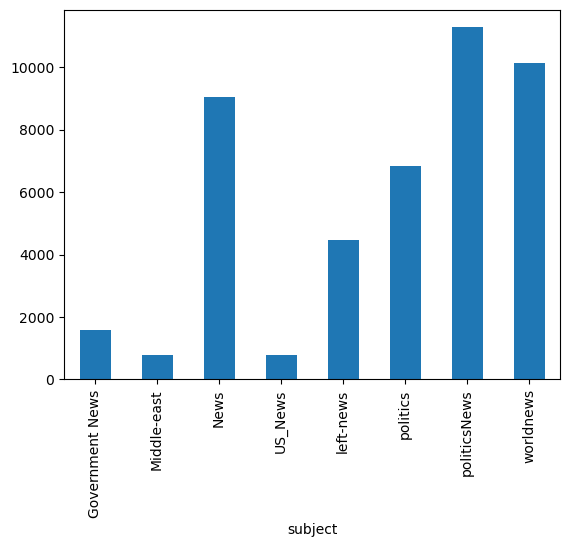

In [88]:
# HOW MANY ARTICLES PER SUBJECTS??
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind='bar')
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


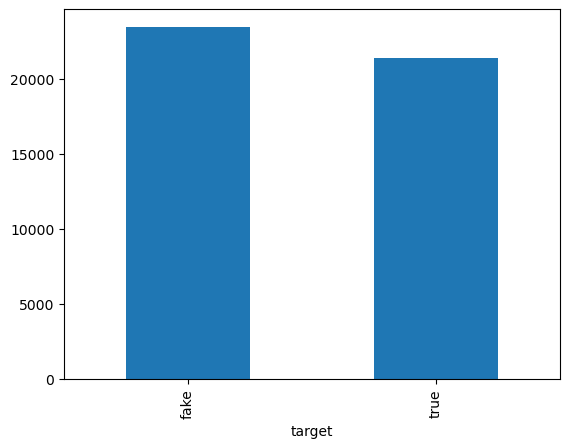

In [89]:
# HOW MANY FAKE AMD REAL ARTICLES

print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind='bar')
plt.show()

In [92]:
# !pip install wordcloud
!pip install wordcloud

     -------------------------------------- 153.3/153.3 kB 1.5 MB/s eta 0:00:00


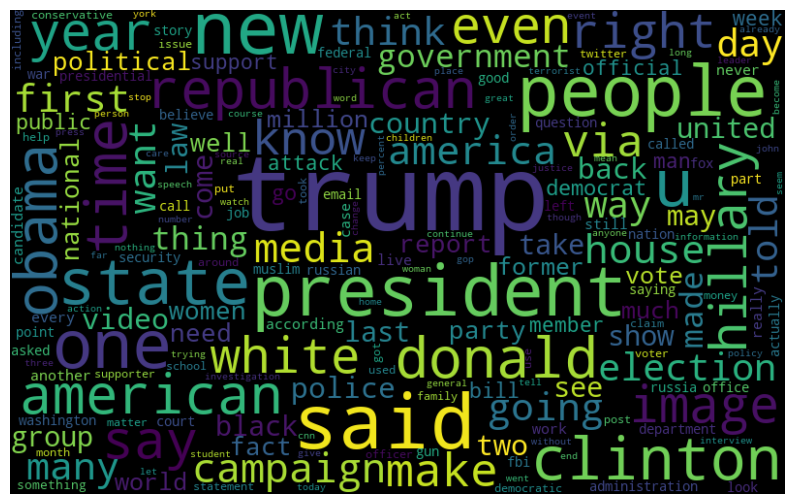

In [93]:
from wordcloud import WordCloud

fake_data=data[data['target']=='fake']
all_words=' '.join([text for text in fake_data.text])

wordcloud=WordCloud(width=800, height=500, max_font_size=110 ,collocations=False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

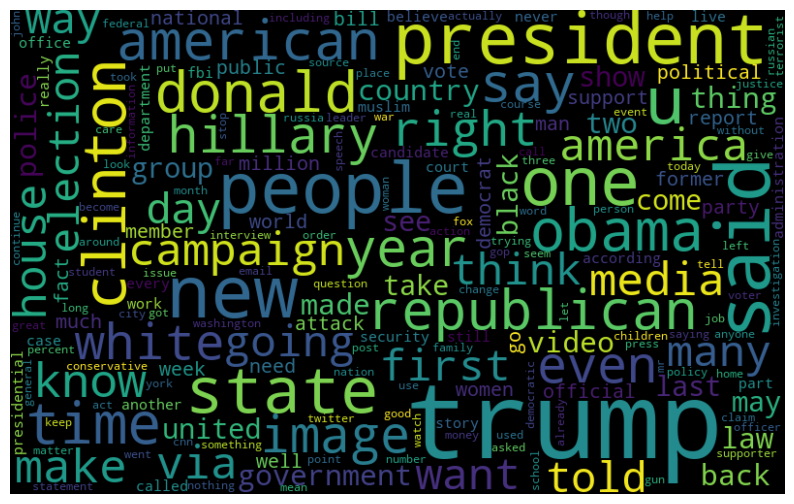

In [98]:
# WORD CLOUD FOR REAL NEWS

from wordcloud import WordCloud

real_data=data[data['target']=='true']
all_words=' '.join([text for text in fake_data.text])

wordcloud=WordCloud(width=800,height=500, max_font_size=110,collocations=False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis('off')
plt.show()


In [99]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'red')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

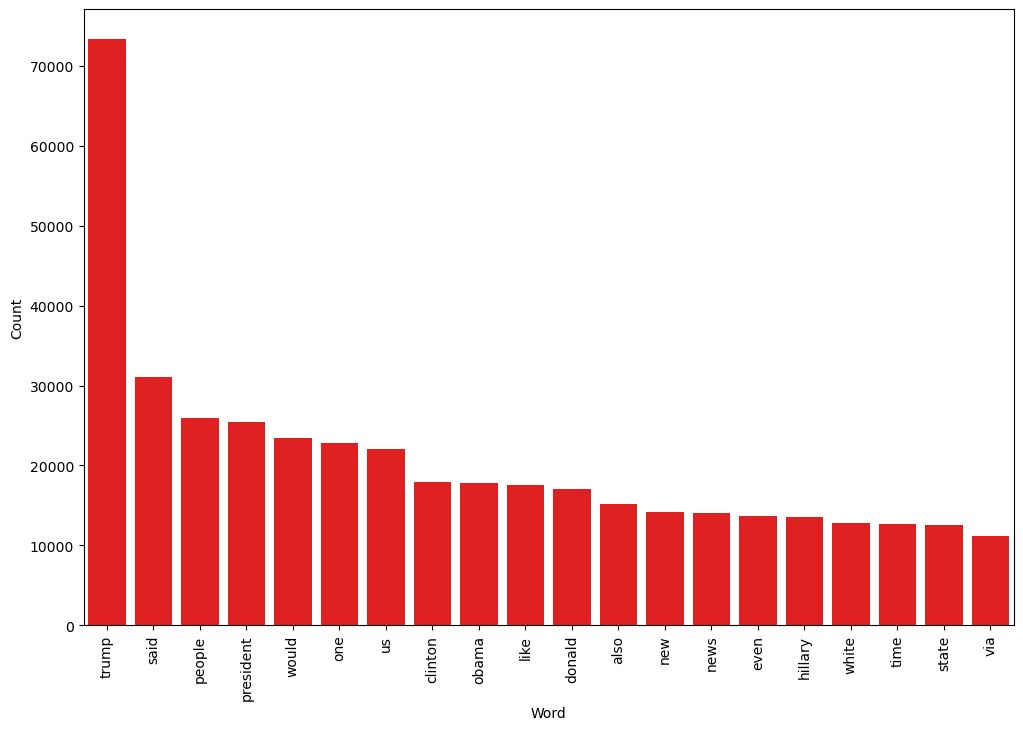

In [101]:
## MOST FREQUENT WORDS IN FAKE NEWS
counter(data[data['target']=='fake'],'text',20)

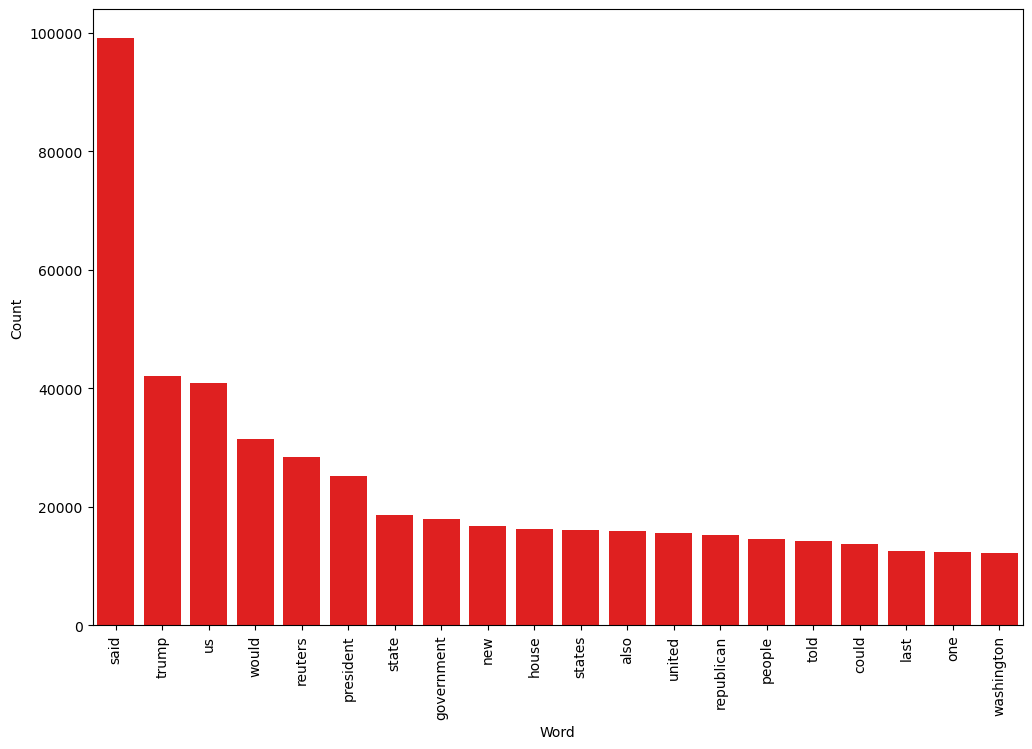

In [102]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

## Modeling

In [125]:
#FUNCTION TO PLOT THE CONFUSION MATRIX

from sklearn import metrics
import itertools

def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes, rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix,without normalization')
        
    thresh=cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
        horizontalalignment='center',
        color='white' if cm[i,j]>thresh else 'black')
                
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## SPLIT DATA

In [126]:
# SPLIT THE DATA
X_train,X_test,y_train,y_test=train_test_split(data['text'],data.target,test_size=0.2,random_state=42)

In [127]:
X_train.head()

36335    world reeling today britain made shocking deci...
12384    group extremely wealthy white men pretending b...
24419    frankfurt reuters frankfurt city center area i...
24740    united nations reuters us state department thu...
27039    london reuters british police hunting behind b...
Name: text, dtype: object

In [128]:
y_train.head()

36335    fake
12384    fake
24419    true
24740    true
27039    true
Name: target, dtype: object

## DECISION TREE CLASSIFIER

In [129]:
from sklearn.tree import DecisionTreeClassifier

# VECTORIZING AND APPLYING TF-IDF
pipe=Pipeline([('vect',CountVectorizer()),
               ('tfidf',TfidfTransformer()),
               ('model',DecisionTreeClassifier(criterion='entropy',max_depth=20,splitter='best',random_state=42))])

#FITTING THE MODEL
model=pipe.fit(X_train,y_train)

#ACCURACY
prediction=model.predict(X_test)
print('accuracy:{}%'.format(round(accuracy_score(y_test,prediction)*100,2)))

accuracy:99.67%


Confusion matrix,without normalization


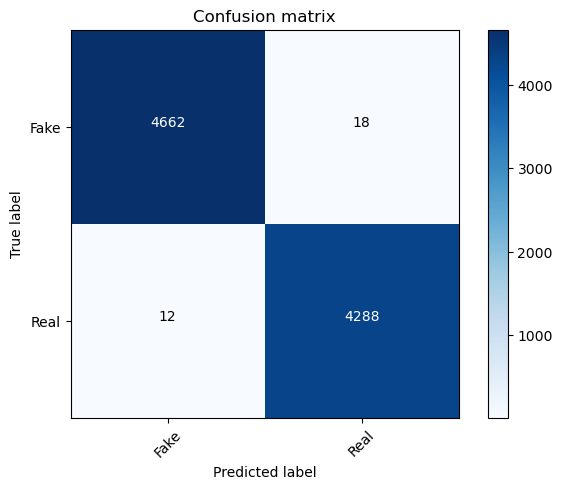

In [130]:
cm = metrics.confusion_matrix(y_test,prediction)
plot_confusion_matrix(cm, classes=['Fake','Real']) 